In [2]:
import os
from github import Github
from dotenv import load_dotenv
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import networkx as nx
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import matplotlib.pyplot as plt
import webcolors


#create an empty graph
G = nx.Graph()

In [3]:
# create nodes and edges between users and repositories
with open('dataset/users.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of repositories into an array of strings
        row[2:4] = [x.replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').replace('"', '').split(',') for x in row[2:4]]
        # Add the user node to graph with blue color
        G.add_node(row[0], name=row[1], repos=row[2], commits= row[3], color='#F8A643')

In [4]:
#create nodes and edges bewtween repositories and languages
with open('dataset/repos.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of languages into an array of strings
        row[2], row[5], row[6] = tuple(x.replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').replace('"', '').split(',') for x in (row[2], row[5], row [6]))
        
        G.add_node(row[0], name=row[1], topics=row[2], n_star=row[3], n_fork=row[4], languages=row[5], p_lang=row[6], color='#5D7EF5')

In [5]:
# Open the CSV file and read the data for languages
with open('dataset/languages.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # Add the language node to graph with green color
        G.add_node(row[0], language=row[1], color='#30FBD0')




In [6]:
#create edges between users, repositories and languages
for node in list(G.nodes):
    # if it's a user node
    if len(node) >= 1:
        if node[0] == "u":
            # for each repository in the user's list of repositories
            for repo in G.nodes[node]['repos']:
                # add an edge between the user and the repository
                G.add_edge(node, repo)
        if node[0] == "r":
            # for each language in the repository's list of languages
            for lang in G.nodes[node]['languages']:
                # add an edge between the repository and the language
                G.add_edge(node, lang)     

nx.info(G)

/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_4296/4017047192.py:16: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 1499 nodes and 2369 edges'

In [7]:
# create a subgraph with only 'repository' and 'user' nodes
subgraph_nodes = [n for n in G.nodes if n.startswith(('u', 'r'))]
# create edges between users and repositories
user_repo_edges = [(u, v) for (v, u) in G.edges if u.startswith('u_') and v.startswith('r_')]
subgraph_ru = G.subgraph(subgraph_nodes)
nx.info(subgraph_ru)

/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_4296/1264201726.py:6: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(subgraph_ru)


'Graph with 1407 nodes and 377 edges'

In [8]:
# crea un sottografo con i nodi utente
user_nodes = [n for n in G.nodes if n.startswith("u")]
subgraph = G.subgraph(user_nodes).copy()

# aggiungi gli archi tra utenti che hanno contribuito alla stessa repository
for repo_node in subgraph_ru.nodes:
    # se il nodo corrente è una repository
    if repo_node.startswith("r"):
        # crea un insieme di utenti che hanno contribuito alla repository corrente
        repo_users = set(subgraph_ru.neighbors(repo_node)).intersection(user_nodes)
        # crea gli archi tra le coppie di utenti che hanno contribuito alla stessa repository
        subgraph.add_edges_from(combinations(repo_users,2))

nx.info(subgraph)

/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_4296/420969897.py:14: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(subgraph)


'Graph with 271 nodes and 284 edges'

### Componenti

Component 0 has 46 nodes
Component 1 has 8 nodes
Component 2 has 7 nodes
Component 3 has 6 nodes
Component 4 has 6 nodes
Component 5 has 6 nodes
Component 6 has 5 nodes
Component 7 has 5 nodes
Component 8 has 4 nodes
Component 9 has 3 nodes


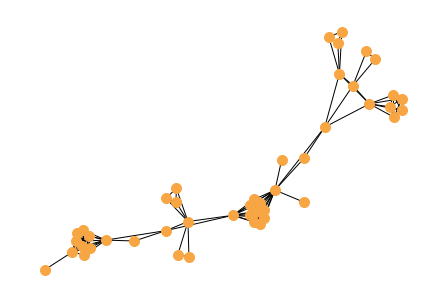

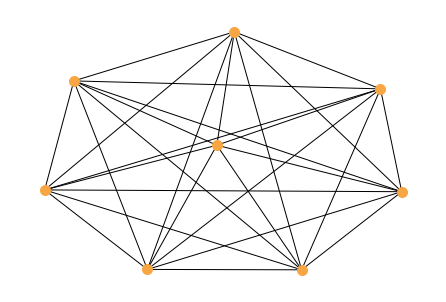

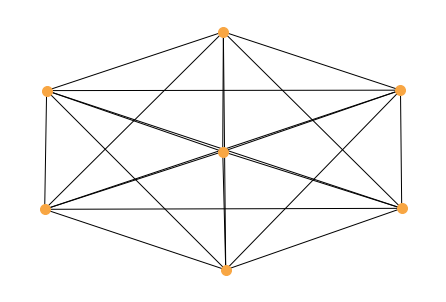

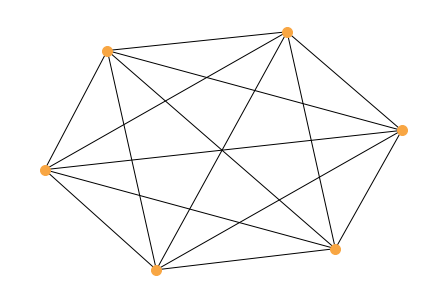

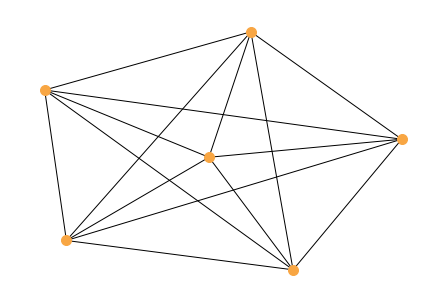

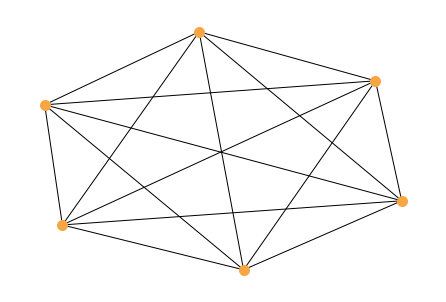

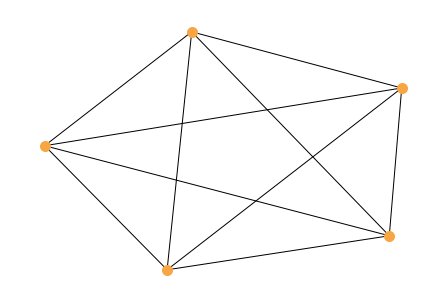

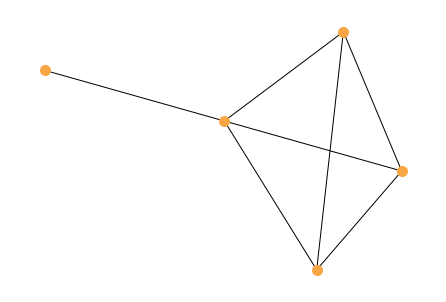

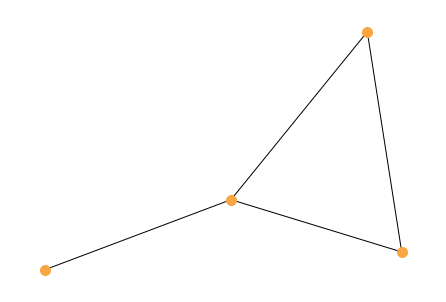

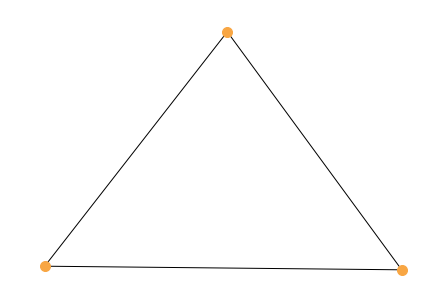

In [9]:
#calculate the component of the subgraph
components = list(nx.connected_components(subgraph))

# create a list of subgraphs
subgraphs = [subgraph.subgraph(c) for c in components]

# create a list of top 5 subgraphs
subgraphs = sorted(subgraphs, key=lambda x: len(x.nodes), reverse=True)[:10]

# print all the subgraphs
for i, g in enumerate(subgraphs):
    print("Component", i, "has", len(g.nodes), "nodes")

# draw all the subgraphs
for i, g in enumerate(subgraphs):
    nx.draw(g, node_color= '#F8A643', node_size = 100)
    plt.show()
    

In [11]:
repo_nodes = [n for n in G.nodes if n.startswith("r")]
subgraph_repos = G.subgraph(repo_nodes).copy()
no_topic_repos= nx.Graph()

for node in subgraph_repos:
    #check if the node have topics value different from ['']
    if subgraph_repos.nodes[node]['topics'] != ['']:
        #add node to no_topic_repos graph
        no_topic_repos.add_node(node, name=subgraph_repos.nodes[node]['name'], topics=subgraph_repos.nodes[node]['topics'], n_star=subgraph_repos.nodes[node]['n_star'], n_fork=subgraph_repos.nodes[node]['n_fork'], languages=subgraph_repos.nodes[node]['languages'], p_lang=subgraph_repos.nodes[node]['p_lang'], color='#5D7EF5')

nx.info(no_topic_repos)

/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_4296/3382688246.py:11: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(no_topic_repos)


'Graph with 33 nodes and 0 edges'

/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_4296/2285086978.py:31: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(new_subgraph_users)


'Graph with 26 nodes and 22 edges'

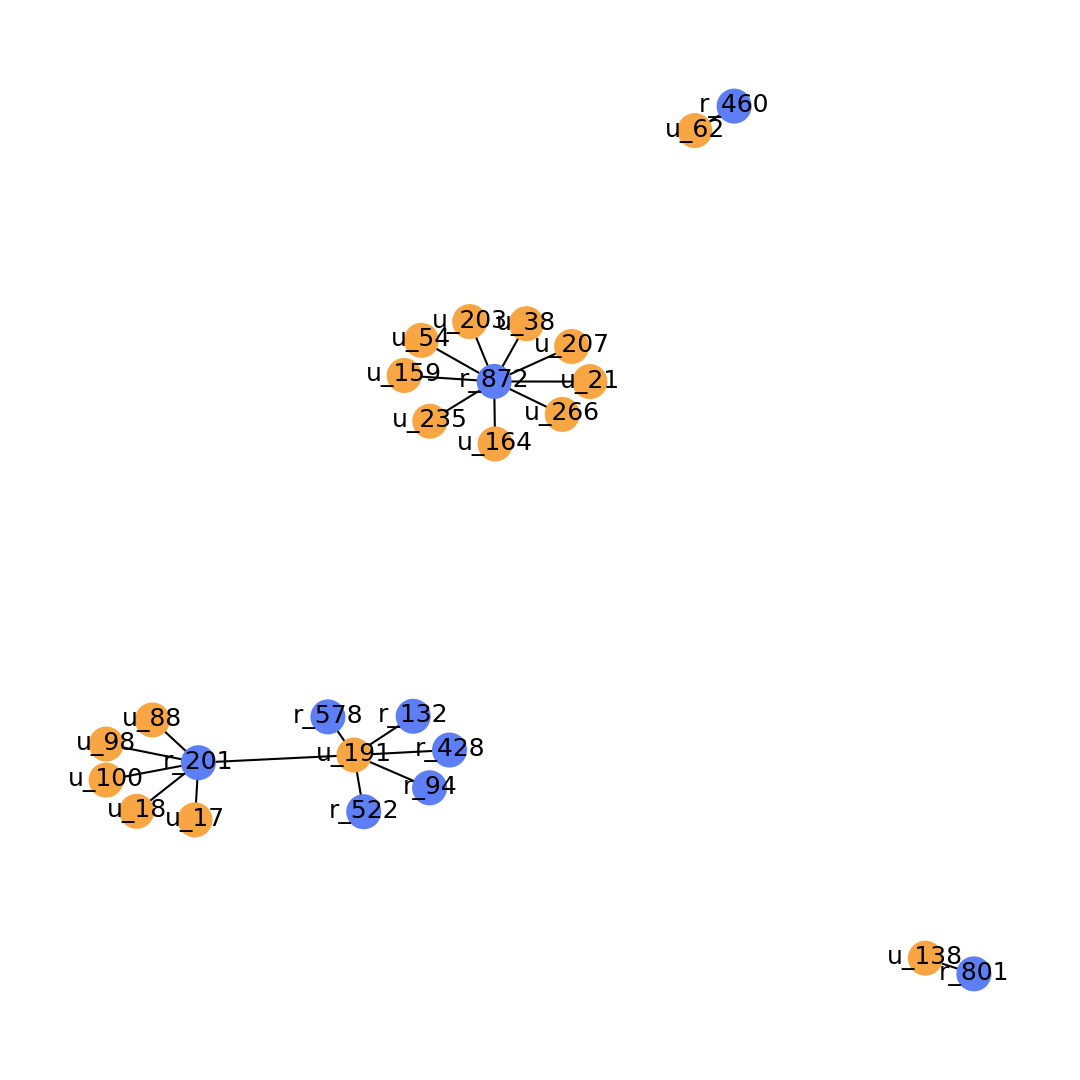

In [12]:
#create a graph with users
user_nodes = [n for n in G.nodes if n.startswith("u")]
subgraph_users = G.subgraph(user_nodes).copy()
new_subgraph_users = nx.Graph()

# check the user that have contributed in any repository of the graph no_topic_repos
for node in subgraph_users:
    # get the repositories that the user has contributed to
    repos = subgraph_users.nodes[node]['repos']
    # check if any of the user's repositories are in no_topic_repos
    if any(repo in no_topic_repos.nodes for repo in repos):
        # add user node to new_subgraph_users
        new_subgraph_users.add_node(node, name=subgraph_users.nodes[node]['name'], repos=repos, commits=subgraph_users.nodes[node]['commits'], color='#F8A643')
        # add edges between user node and the repositories in no_topic_repos
        for repo in repos:
            if repo in no_topic_repos.nodes:
                new_subgraph_users.add_node(repo, name=no_topic_repos.nodes[repo]['name'], topics=no_topic_repos.nodes[repo]['topics'], n_star=no_topic_repos.nodes[repo]['n_star'], n_fork=no_topic_repos.nodes[repo]['n_fork'], languages=no_topic_repos.nodes[repo]['languages'], p_lang=no_topic_repos.nodes[repo]['p_lang'], color='#5D7EF5')
                new_subgraph_users.add_edge(node, repo)

#draw the graph with different colors for users and repositories
for node in new_subgraph_users:
    if node[0] == "u":
        new_subgraph_users.nodes[node]['color'] = '#F8A643'
        new_subgraph_users.nodes[node]['size'] = '400'
    else:
        new_subgraph_users.nodes[node]['color'] = '#5D7EF5'

plt.figure(num=None, figsize=(7, 7), dpi=150)
nx.draw(new_subgraph_users,node_color=[new_subgraph_users.nodes[node]['color'] for node in new_subgraph_users.nodes], node_size= 250, with_labels=True)

nx.info(new_subgraph_users)


Component 0 has 9 nodes
Component 1 has 6 nodes
Component 2 has 1 nodes
Component 3 has 1 nodes


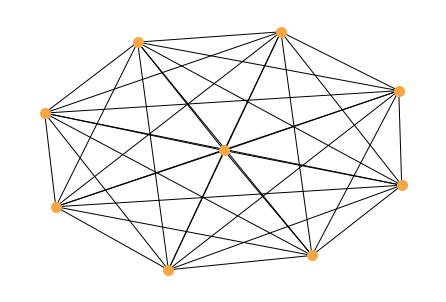

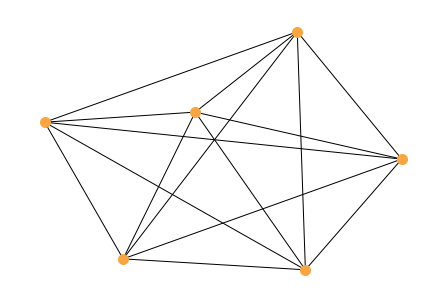

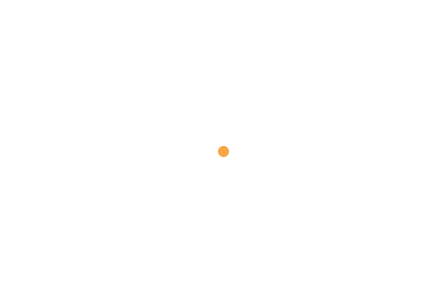

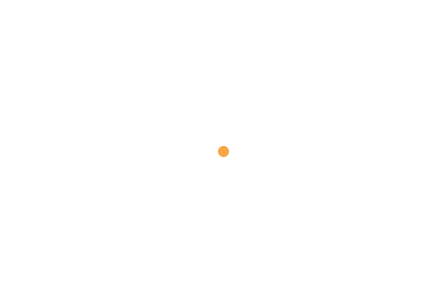

In [14]:
#calculate the component of the subgraph
components = list(nx.connected_components(new_subgraph_users))

# create a list of subgraphs
subgraphs_list = [subgraph.subgraph(c) for c in components]

# create a list of top 5 subgraphs
subgraphs_list = sorted(subgraphs_list, key=lambda x: len(x.nodes), reverse=True)[:5]

# print all the subgraphs
for i, g in enumerate(subgraphs_list):
    print("Component", i, "has", len(g.nodes), "nodes")

# draw all the subgraphs
for i, g in enumerate(subgraphs_list):
    nx.draw(g, node_size = 100, node_color= '#F8A643')
    plt.show()

In [15]:
#chec if the subgraphs_list have the same component of subgraphs
for i, g in enumerate(subgraphs_list):
    if g.nodes != subgraphs[i].nodes:
        print("Component", i, "is different")
    else:
        print("Component", i, "is equal")

Component 0 is different
Component 1 is different
Component 2 is different
Component 3 is different


### Betweenness Centrality

In [16]:
#calculate the betweenness centrality of all user node
betweenness = nx.betweenness_centrality(subgraph, normalized=True)

#calculate the betweenness centrality of languages nodes
lang_btc = {k: v for k, v in betweenness.items() if k.startswith('u_')}

#print the betweenness centrality of firts 5 languages in descendig order
for node, centrality in sorted(lang_btc.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("Node", node, "has betweenness centrality", centrality)


Node u_238 has betweenness centrality 0.01396117306897976
Node u_148 has betweenness centrality 0.013382899628252789
Node u_237 has betweenness centrality 0.011455321492496213
Node u_185 has betweenness centrality 0.010298774611042269
Node u_235 has betweenness centrality 0.008921933085501859
Node u_64 has betweenness centrality 0.0056725870852264906
Node u_67 has betweenness centrality 0.005507366102161641
Node u_157 has betweenness centrality 0.003469640644361834
Node u_172 has betweenness centrality 0.0023681674239295057
Node u_207 has betweenness centrality 0.001211620542475561


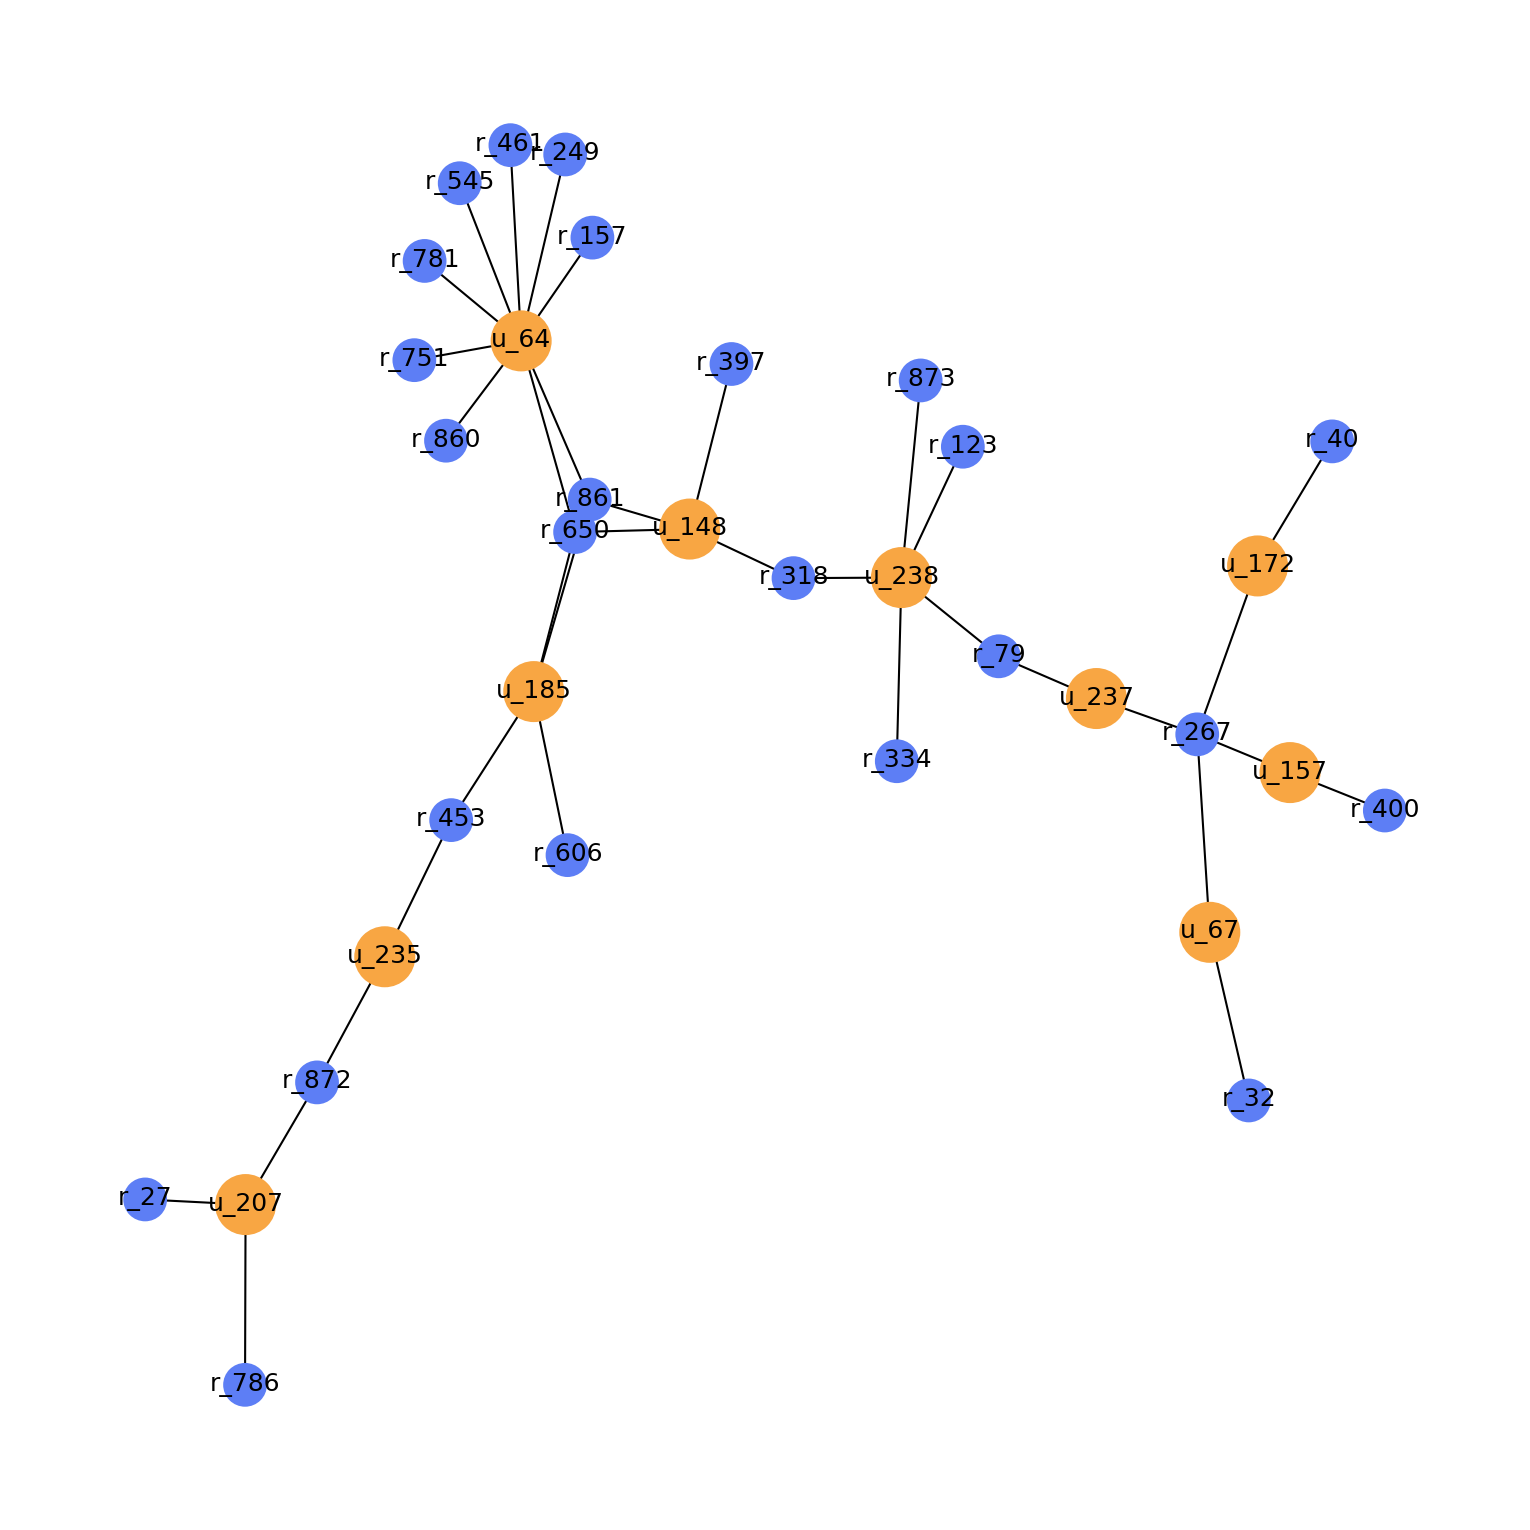

In [17]:
# Draw the graph containing only the top 5 user with neighbours based on degree centrality
languages_subgraph = nx.Graph()
for node in sorted(lang_btc, key=lang_btc.get, reverse=True)[:10]:
    languages_subgraph.add_node(node, color = G.nodes[node]['color'])
    for neighbour in G.neighbors(node):
        if neighbour[0] == "u":
            languages_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        else:
            languages_subgraph.add_node(neighbour, color = G.nodes[neighbour]['color'])
        languages_subgraph.add_edge(node, neighbour)

plt.figure(num=None, figsize=(10, 10), dpi=150)
pos = nx.kamada_kawai_layout(languages_subgraph)
node_sizes = []
for node in languages_subgraph.nodes:
    if node.startswith('u_'):
        node_sizes.append(800)
    elif node.startswith('u_'):
        node_sizes.append(400)
    else:
        node_sizes.append(400)
nx.draw(languages_subgraph, pos, node_size=node_sizes, node_color=[languages_subgraph.nodes[node]['color'] for node in languages_subgraph.nodes], with_labels=True)
#labels = {node: node for node in languages_subgraph.nodes if node.startswith('u_')}
#nx.draw_networkx_labels(languages_subgraph, pos, labels, font_size=10)

### k-mean clustering

In [18]:
adj_matrix = nx.adjacency_matrix(subgraph_ru)

# Calcolo del k-means clustering
k = 3 # Numero di cluster desiderato
kmeans = KMeans(n_clusters=k, random_state=0).fit(adj_matrix)

# Visualizzazione dei risultati
for i in range(k):
    nodes = np.where(kmeans.labels_ == i)[0]
    print("Cluster", i, ":", nodes)

/var/folders/w2/jn05b8cd0kj32r1y2sywf38w0000gn/T/ipykernel_4296/666967622.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(subgraph_ru)


Cluster 0 : [   0    2    3 ... 1404 1405 1406]
Cluster 1 : [  1   7  12  33  43  91 119 148 149 238 253]
Cluster 2 : [588]


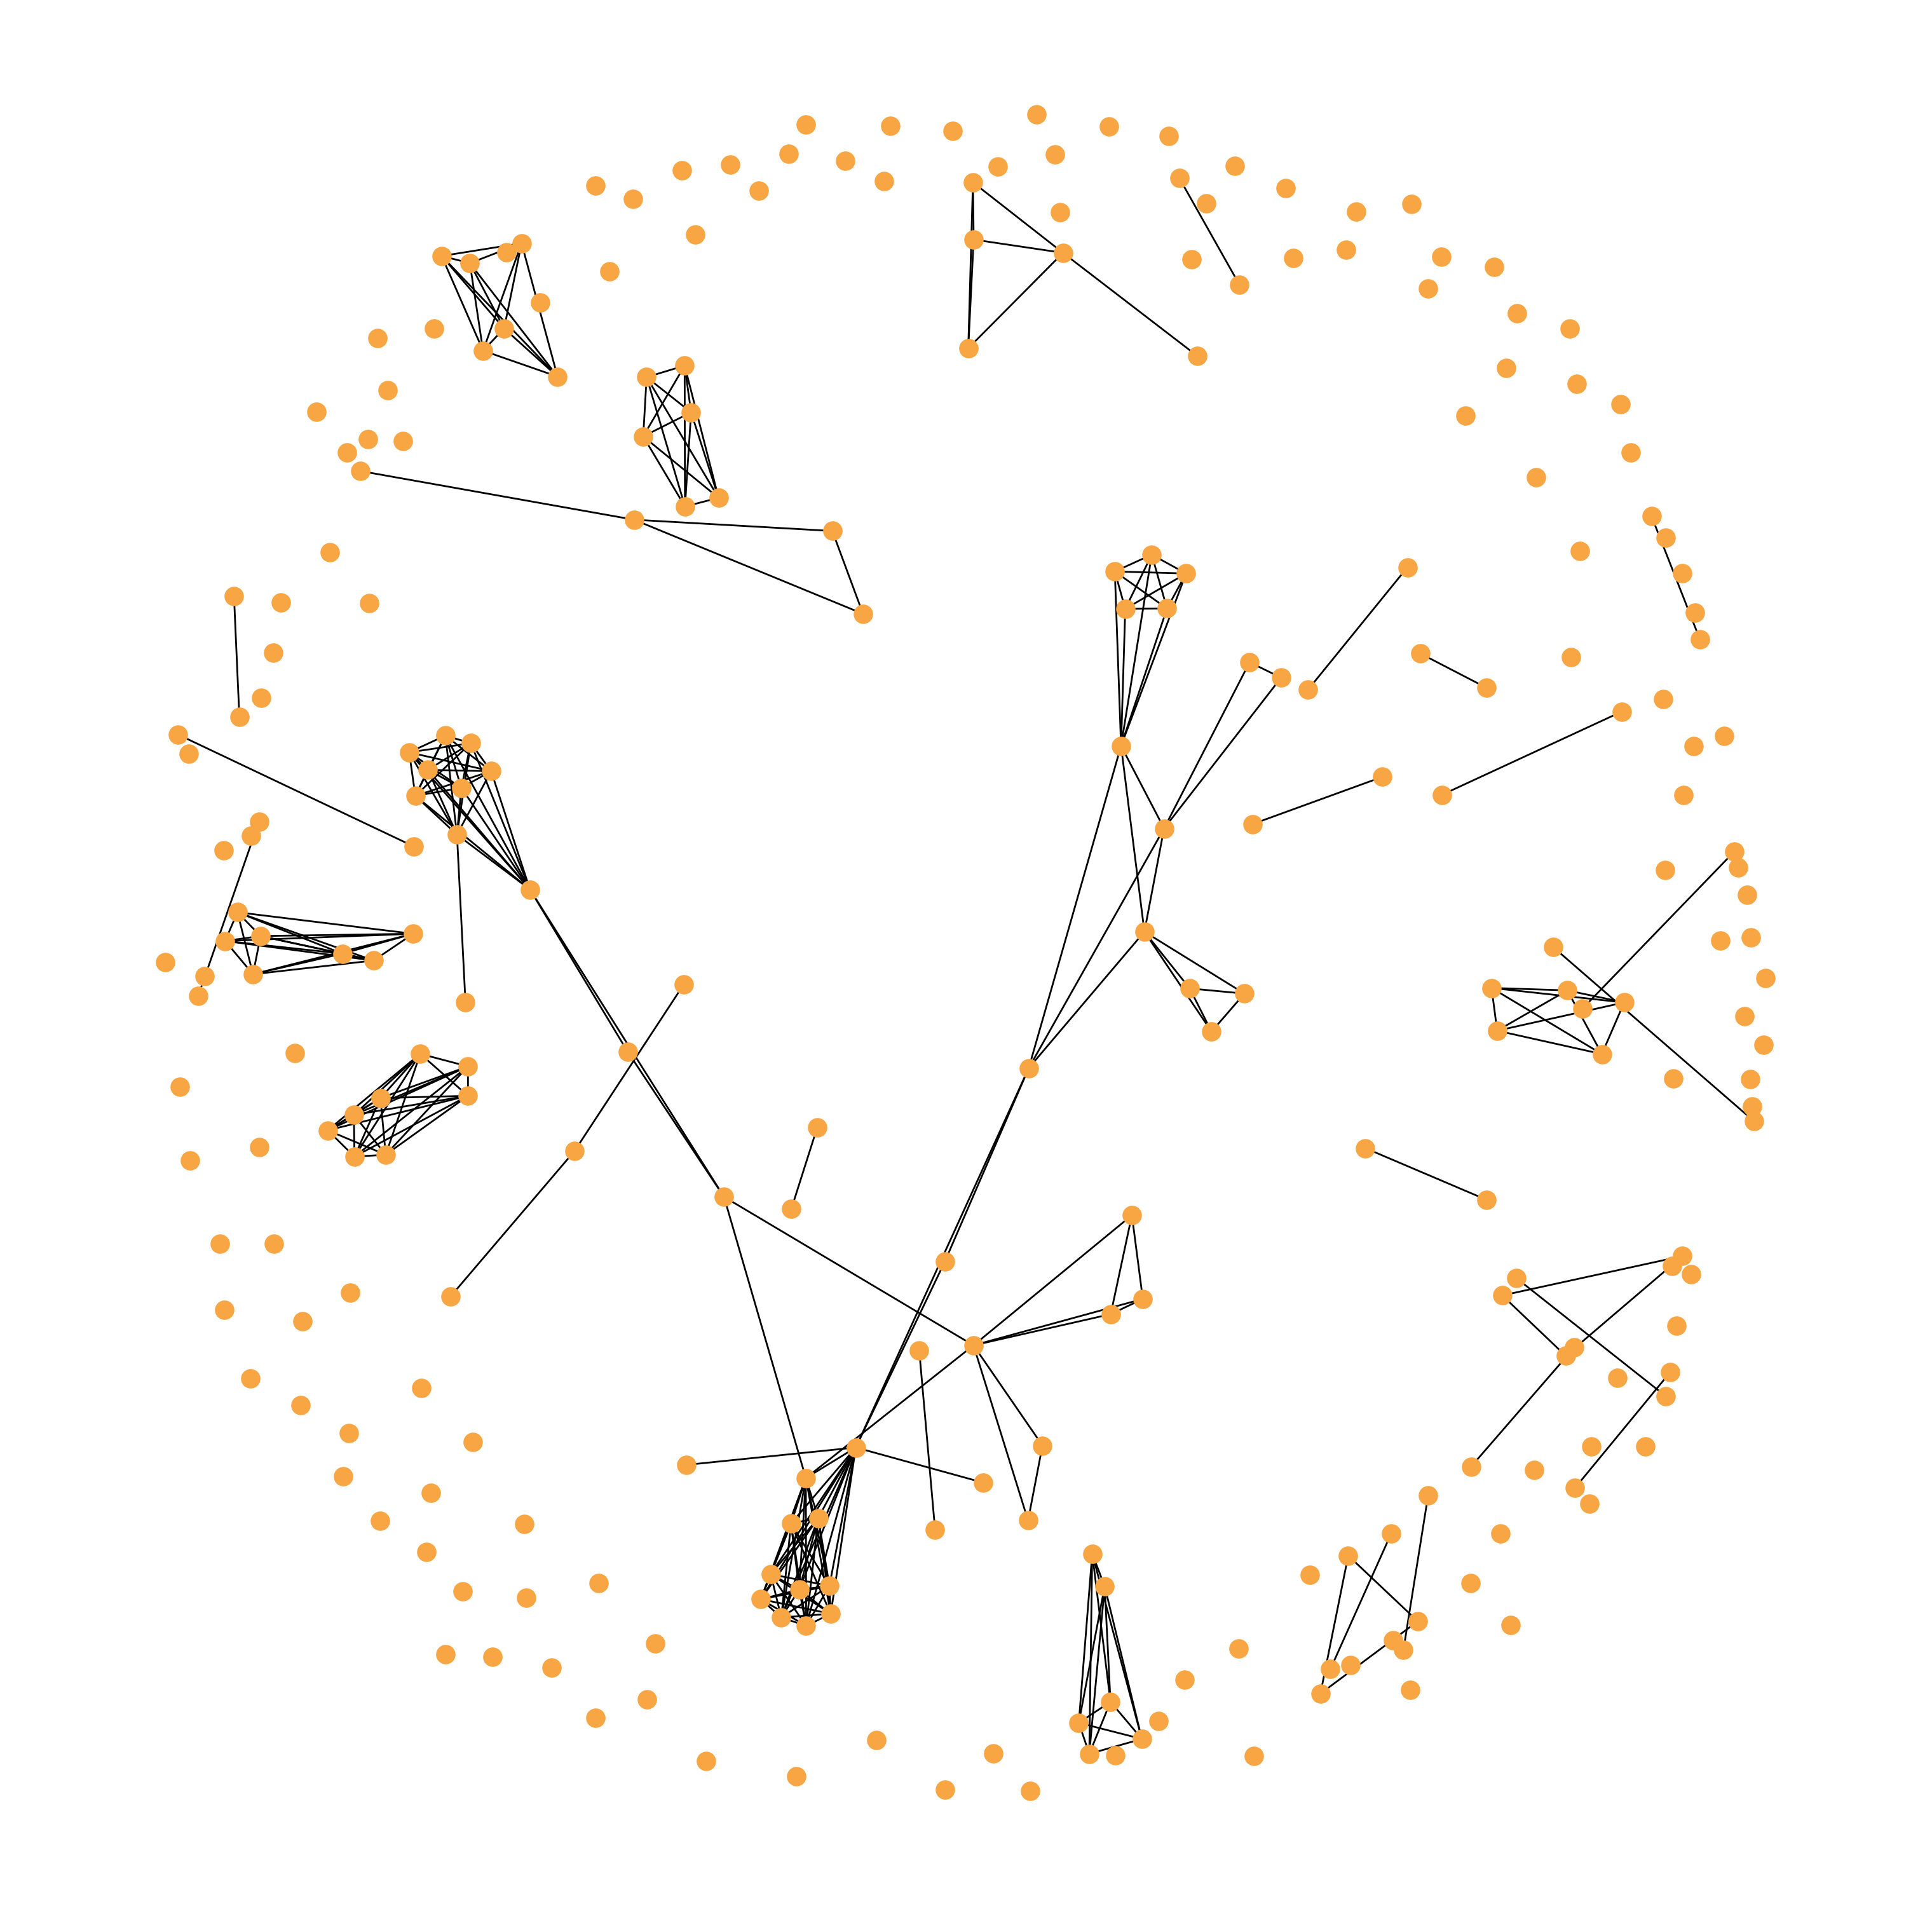

In [19]:
plt.figure(num=None, figsize=(15, 15), dpi=200)
pos = nx.spring_layout(subgraph, k=0.25)
nx.draw(subgraph, pos, node_size=100,node_color='#F8A643')

Component 0 has 37 nodes and is colored red
Component 1 has 5 nodes and is colored lime
Component 2 has 6 nodes and is colored blue
Component 3 has 4 nodes and is colored yellow
Component 4 has 6 nodes and is colored cyan
Component 5 has 6 nodes and is colored magenta
Component 6 has 8 nodes and is colored pink
Component 7 has 7 nodes and is colored #FF9900


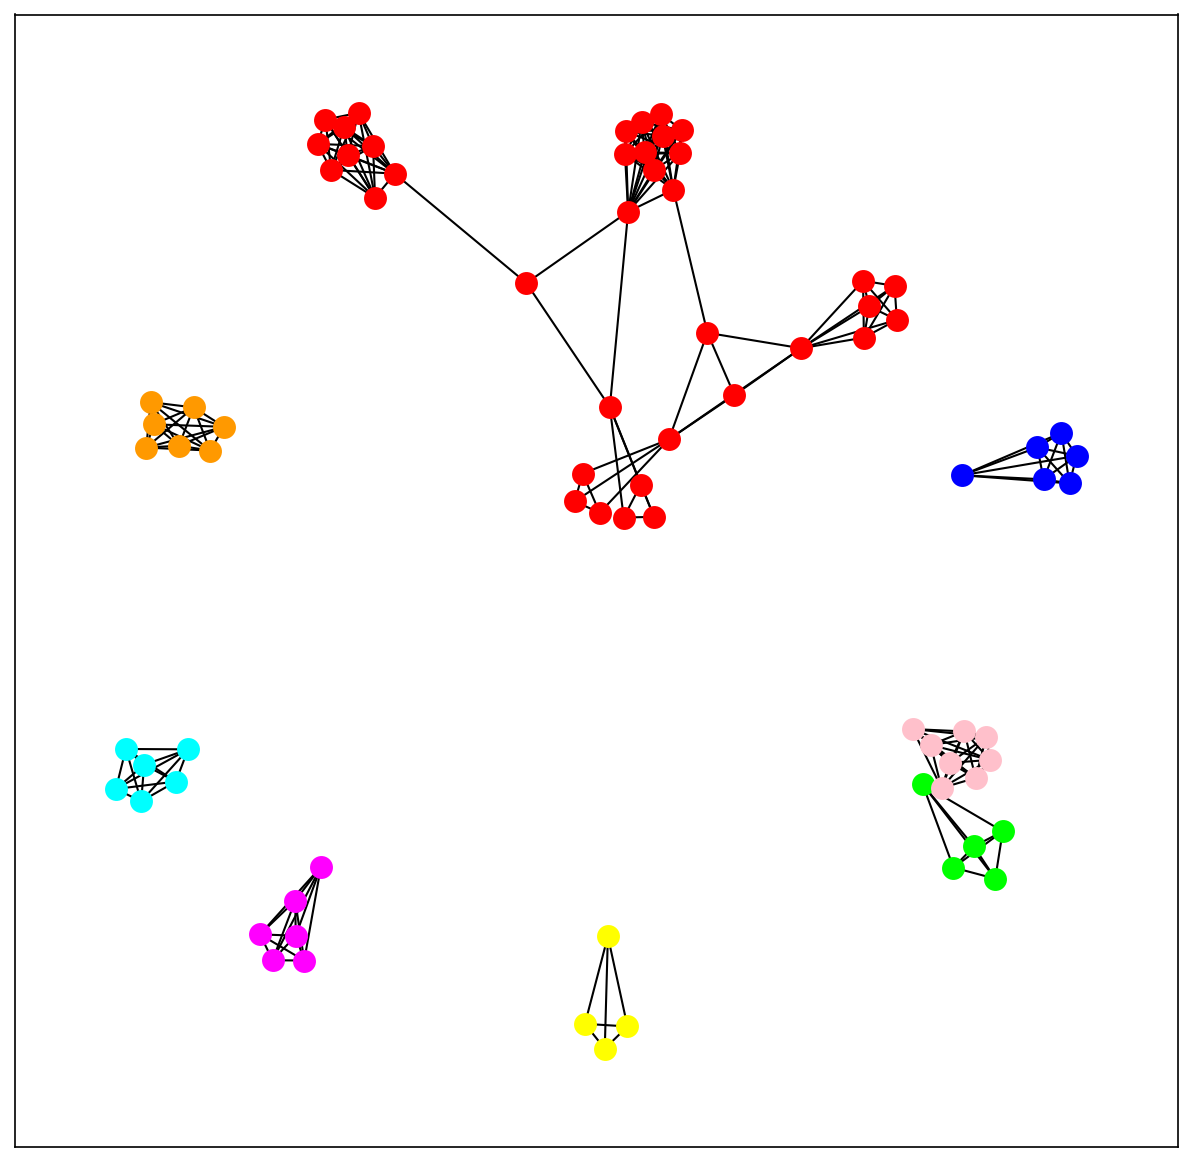

In [20]:
# Create a graph containing only the nodes with at least two edges
graph_for_clustering_removed = nx.Graph()
for node in subgraph.nodes:
    if subgraph.degree(node) > 2:
        graph_for_clustering_removed.add_node(node, name=subgraph.nodes[node]['name'], color=subgraph.nodes[node]['color'])
        for neighbor in subgraph.neighbors(node):
            if subgraph.degree(neighbor) > 2:
                graph_for_clustering_removed.add_node(neighbor, name=subgraph.nodes[neighbor]['name'], color=subgraph.nodes[neighbor]['color'])
                graph_for_clustering_removed.add_edge(node, neighbor)

# Calcola le componenti connesse
components = list(nx.connected_components(graph_for_clustering_removed))

# Crea un dizionario che mappa i nodi alle rispettive componenti
node_to_component = {}
for i, component in enumerate(components):
    for node in component:
        node_to_component[node] = i

#delete the component 8
components.pop(8)

# Crea una lista di colori per le componenti
color_list = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#FFC0CB', '#FF9900']

# Crea una lista di nomi di colori corrispondenti alla lista di colori esadecimali
color_names = []
for color in color_list:
    try:
        color_names.append(webcolors.hex_to_name(color))
    except ValueError:
        color_names.append(color)

# Stampa la lista di componenti con i nomi dei colori
for i, component in enumerate(components):
    print("Component", i, "has", len(component), "nodes and is colored", color_names[i % len(color_names)])




# Crea una lista di colori per le componenti
color_list = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#00FFFF', '#FF00FF', '#FFC0CB', '#FF9900']

# Disegna il grafo colorato per componente
plt.figure(figsize=(10,10), dpi=150)
pos = nx.spring_layout(graph_for_clustering_removed, k=0.25)
for i, component in enumerate(components):
    nx.draw_networkx_nodes(graph_for_clustering_removed, pos, nodelist=list(component),
                           node_size=100, node_color=color_list[i % len(color_list)])
nx.draw_networkx_edges(graph_for_clustering_removed, pos, width=1)
#nx.draw_networkx_labels(graph_for_clustering_removed, pos, font_size=10)
plt.show()

### Coefficiente di clustering

In [41]:
clustering_coefficient = nx.average_clustering(subgraph)
clustering_coefficient2 = nx.average_clustering(graph_for_clustering_removed)

print ("Clustering coefficient:", clustering_coefficient)
print ("Clustering coefficient2:", clustering_coefficient2)

Clustering coefficient: 0.32359311455252415
Clustering coefficient2: 0.9423818542568544


### Coefficiente di clustering medio
Questo coefficiente misura la probabilità che i vicini di un nodo siano anche vicini tra di loro. Un coefficiente di clustering elevato indica una maggiore omogeneità statistica

In [26]:
mean_clustering = nx.average_clustering(graph_for_clustering_removed)

print("Mean clustering coefficient:", mean_clustering)

Mean clustering coefficient: 0.9397273486747172


### Coefficiente di assortatività
Questo coefficiente misura la tendenza dei nodi simili ad associarsi tra di loro. Un coefficiente di assortatività elevato indica una maggiore omogeneità statistica.

In [27]:
assortativity = nx.degree_assortativity_coefficient(graph_for_clustering_removed)

print("Assortativity coefficient:", assortativity)

Assortativity coefficient: 0.8081480536280796


In [30]:
mean_degree = nx.average_degree_connectivity(graph_for_clustering_removed)

print("Mean degree:", mean_degree)

Mean degree: {10: 10.06, 12: 9.25, 7: 6.682539682539683, 5: 5.168, 4: 4.625, 2: 3.3, 3: 3.7, 6: 5.8125, 8: 7.902777777777778, 0: 0}


### Cliques

In [21]:
def same_langs(repo1, repo2):
    langs1 = set(G.nodes[repo1]['languages'])
    langs2 = set(G.nodes[repo2]['languages'])
    return langs1 == langs2

repos = [r for r in G.nodes if r.startswith('r_')]
structural_equivalence = nx.equivalence_classes(repos, same_langs)

# Print the number of structural equivalence classes
print("\nNumber of structural equivalence classes:", structural_equivalence)

# Ottieni le combinazioni di linguaggi utilizzati insieme
lang_combinations = {}
for equiv_class in structural_equivalence:
    lang_set = set()
    for repo in equiv_class:
        lang_set.update(set(G.nodes[repo]['languages']))
    for combo in combinations(lang_set, 2):
        lang_combinations[combo] = lang_combinations.get(combo, 0) + 1

#creazione del grafo
G_langs = nx.Graph()

top_combinations = sorted(lang_combinations.items(), key=lambda x: x[1], reverse=True)[:50]

print("\nTop 5 language combinations:")
for combo, count in top_combinations:
    print(combo, count)

#creazione del grafo
G_langs = nx.Graph()
for combo, count in top_combinations:
    lang1, lang2 = combo
    G_langs.add_edge(lang1, lang2, weight=count)


Number of structural equivalence classes: {frozenset({'r_1128'}), frozenset({'r_390'}), frozenset({'r_227'}), frozenset({'r_828', 'r_854', 'r_847', 'r_914', 'r_392', 'r_630', 'r_1129', 'r_263', 'r_512', 'r_145', 'r_324', 'r_236', 'r_576'}), frozenset({'r_175'}), frozenset({'r_641', 'r_624'}), frozenset({'r_372', 'r_252'}), frozenset({'r_127', 'r_444', 'r_593'}), frozenset({'r_368', 'r_104'}), frozenset({'r_308'}), frozenset({'r_445', 'r_858', 'r_468'}), frozenset({'r_1003', 'r_840', 'r_569', 'r_921', 'r_435', 'r_115', 'r_1125', 'r_41', 'r_952', 'r_555', 'r_101', 'r_955', 'r_651', 'r_917', 'r_47', 'r_187', 'r_214', 'r_538', 'r_948', 'r_956', 'r_1023', 'r_97', 'r_1136', 'r_1100', 'r_608', 'r_248', 'r_271', 'r_1043', 'r_349', 'r_542', 'r_820', 'r_141', 'r_759', 'r_267', 'r_841', 'r_859', 'r_611', 'r_602', 'r_1120', 'r_434', 'r_452', 'r_557', 'r_424', 'r_250', 'r_601', 'r_89', 'r_70', 'r_454', 'r_370', 'r_464', 'r_980', 'r_327', 'r_142', 'r_1085', 'r_664', 'r_180', 'r_237', 'r_753', 'r_94

In [22]:
cliques = list(nx.find_cliques(G_langs))

print("Number of cliques:", len(cliques))
print(cliques)

Number of cliques: 12
[['l_30', 'l_4', 'l_6'], ['l_0', 'l_13'], ['l_0', 'l_4', 'l_3', 'l_1'], ['l_0', 'l_4', 'l_6', 'l_1', 'l_10'], ['l_0', 'l_4', 'l_6', 'l_1', 'l_8'], ['l_0', 'l_4', 'l_6', 'l_12'], ['l_0', 'l_4', 'l_6', 'l_9', 'l_10'], ['l_0', 'l_4', 'l_6', 'l_9', 'l_11'], ['l_0', 'l_4', 'l_6', 'l_9', 'l_8'], ['l_0', 'l_4', 'l_14', 'l_1', 'l_2'], ['l_0', 'l_4', 'l_18', 'l_9'], ['l_0', 'l_7']]


7


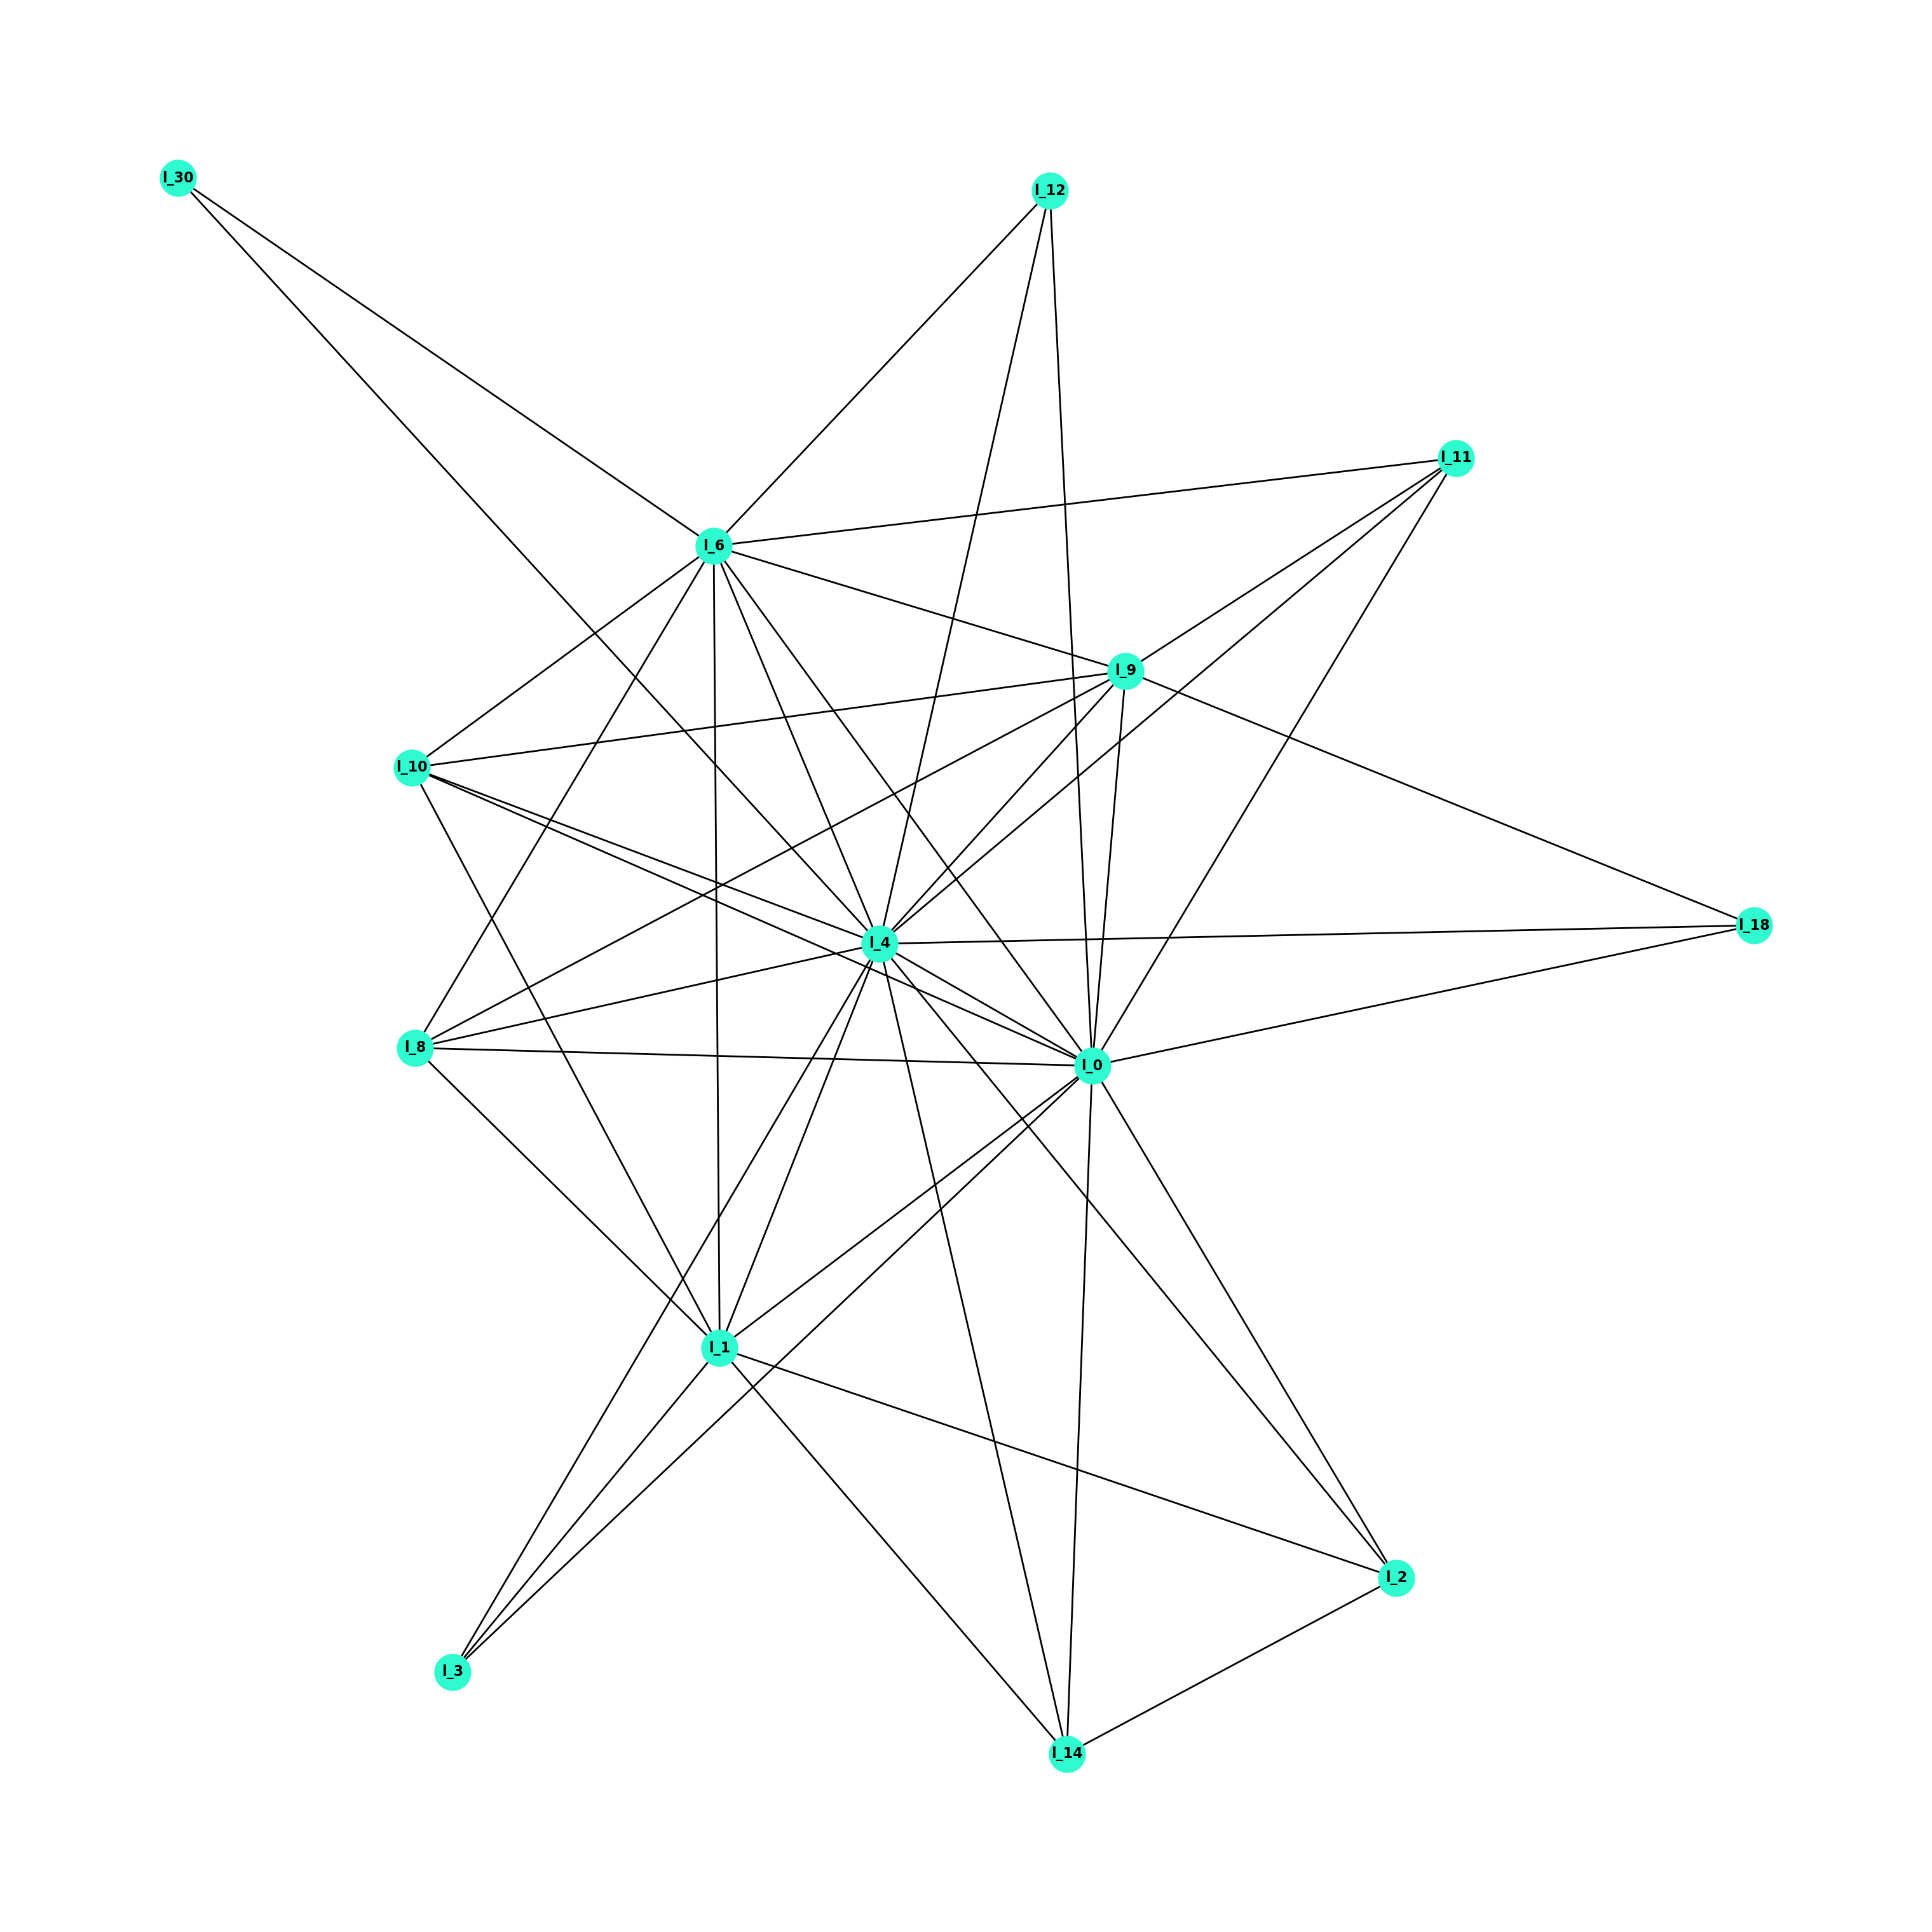

In [23]:
#draw the graph of the cliques in G_langs
G_langs_cliques = nx.Graph()

for clique in cliques:
    if len(clique) > 2:
        for node in clique:
            G_langs_cliques.add_node(node)
        for edge in combinations(clique, 2):
            G_langs_cliques.add_edge(edge[0], edge[1])

print(count)

plt.figure(num=None, figsize=(15, 15), dpi=200)
pos = nx.spring_layout(G_langs_cliques)
nx.draw(G_langs_cliques, pos, with_labels=True, font_size=8, font_weight='bold', node_color='#30FBD0',node_size=400)

In [24]:
#calculare structural equivalence classes
def same_langs(repo1, repo2):
    langs1 = set(G.nodes[repo1]['languages'])
    langs2 = set(G.nodes[repo2]['languages'])
    return langs1 == langs2

repos = [r for r in G.nodes if r.startswith('r_')]
structural_equivalence = nx.equivalence_classes(repos, same_langs)

# Print the number of structural equivalence classes
print("\nNumber of structural equivalence classes:", structural_equivalence)

# Ottieni le combinazioni di linguaggi utilizzati insieme 
lang_combinations = {}
for equiv_class in structural_equivalence:
    lang_set = set()
    for repo in equiv_class:
        lang_set.update(set(G.nodes[repo]['languages']))
    for combo in combinations(lang_set, 2):
        if 'l_4' not in combo:
            lang_combinations[combo] = lang_combinations.get(combo, 0) + 1

# Stampa le 5 combinazioni di linguaggi più utilizzate
top_combinations = sorted(lang_combinations.items(), key=lambda x: x[1], reverse=True)[:50]
print("\nTop 5 language combinations:")
for combo, count in top_combinations:
    print(combo, count)

#creazione del grafo
G_langs1 = nx.Graph()
for combo, count in top_combinations:
    lang1, lang2 = combo
    if lang1 != 'l_4' and lang2 != 'l_4':
        G_langs1.add_edge(lang1, lang2, weight=count)



Number of structural equivalence classes: {frozenset({'r_1128'}), frozenset({'r_390'}), frozenset({'r_227'}), frozenset({'r_828', 'r_854', 'r_847', 'r_914', 'r_392', 'r_630', 'r_1129', 'r_263', 'r_512', 'r_145', 'r_324', 'r_236', 'r_576'}), frozenset({'r_175'}), frozenset({'r_641', 'r_624'}), frozenset({'r_372', 'r_252'}), frozenset({'r_127', 'r_444', 'r_593'}), frozenset({'r_368', 'r_104'}), frozenset({'r_308'}), frozenset({'r_445', 'r_858', 'r_468'}), frozenset({'r_1003', 'r_840', 'r_569', 'r_921', 'r_435', 'r_115', 'r_1125', 'r_41', 'r_952', 'r_555', 'r_101', 'r_955', 'r_651', 'r_917', 'r_47', 'r_187', 'r_214', 'r_538', 'r_948', 'r_956', 'r_1023', 'r_97', 'r_1136', 'r_1100', 'r_608', 'r_248', 'r_271', 'r_1043', 'r_349', 'r_542', 'r_820', 'r_141', 'r_759', 'r_267', 'r_841', 'r_859', 'r_611', 'r_602', 'r_1120', 'r_434', 'r_452', 'r_557', 'r_424', 'r_250', 'r_601', 'r_89', 'r_70', 'r_454', 'r_370', 'r_464', 'r_980', 'r_327', 'r_142', 'r_1085', 'r_664', 'r_180', 'r_237', 'r_753', 'r_94

In [25]:
cliques = list(nx.find_cliques(G_langs1))

print("Number of cliques:", len(cliques))
print(cliques)

Number of cliques: 13
[['l_28', 'l_12'], ['l_30', 'l_9', 'l_6', 'l_11'], ['l_30', 'l_9', 'l_6', 'l_18'], ['l_0', 'l_3', 'l_1', 'l_2'], ['l_0', 'l_6', 'l_9', 'l_12'], ['l_0', 'l_6', 'l_9', 'l_10', 'l_1', 'l_8'], ['l_0', 'l_6', 'l_9', 'l_10', 'l_11'], ['l_0', 'l_6', 'l_9', 'l_18', 'l_8'], ['l_0', 'l_6', 'l_7', 'l_11'], ['l_0', 'l_14', 'l_1', 'l_2'], ['l_0', 'l_14', 'l_1', 'l_8'], ['l_0', 'l_13', 'l_1'], ['l_25', 'l_1']]


0


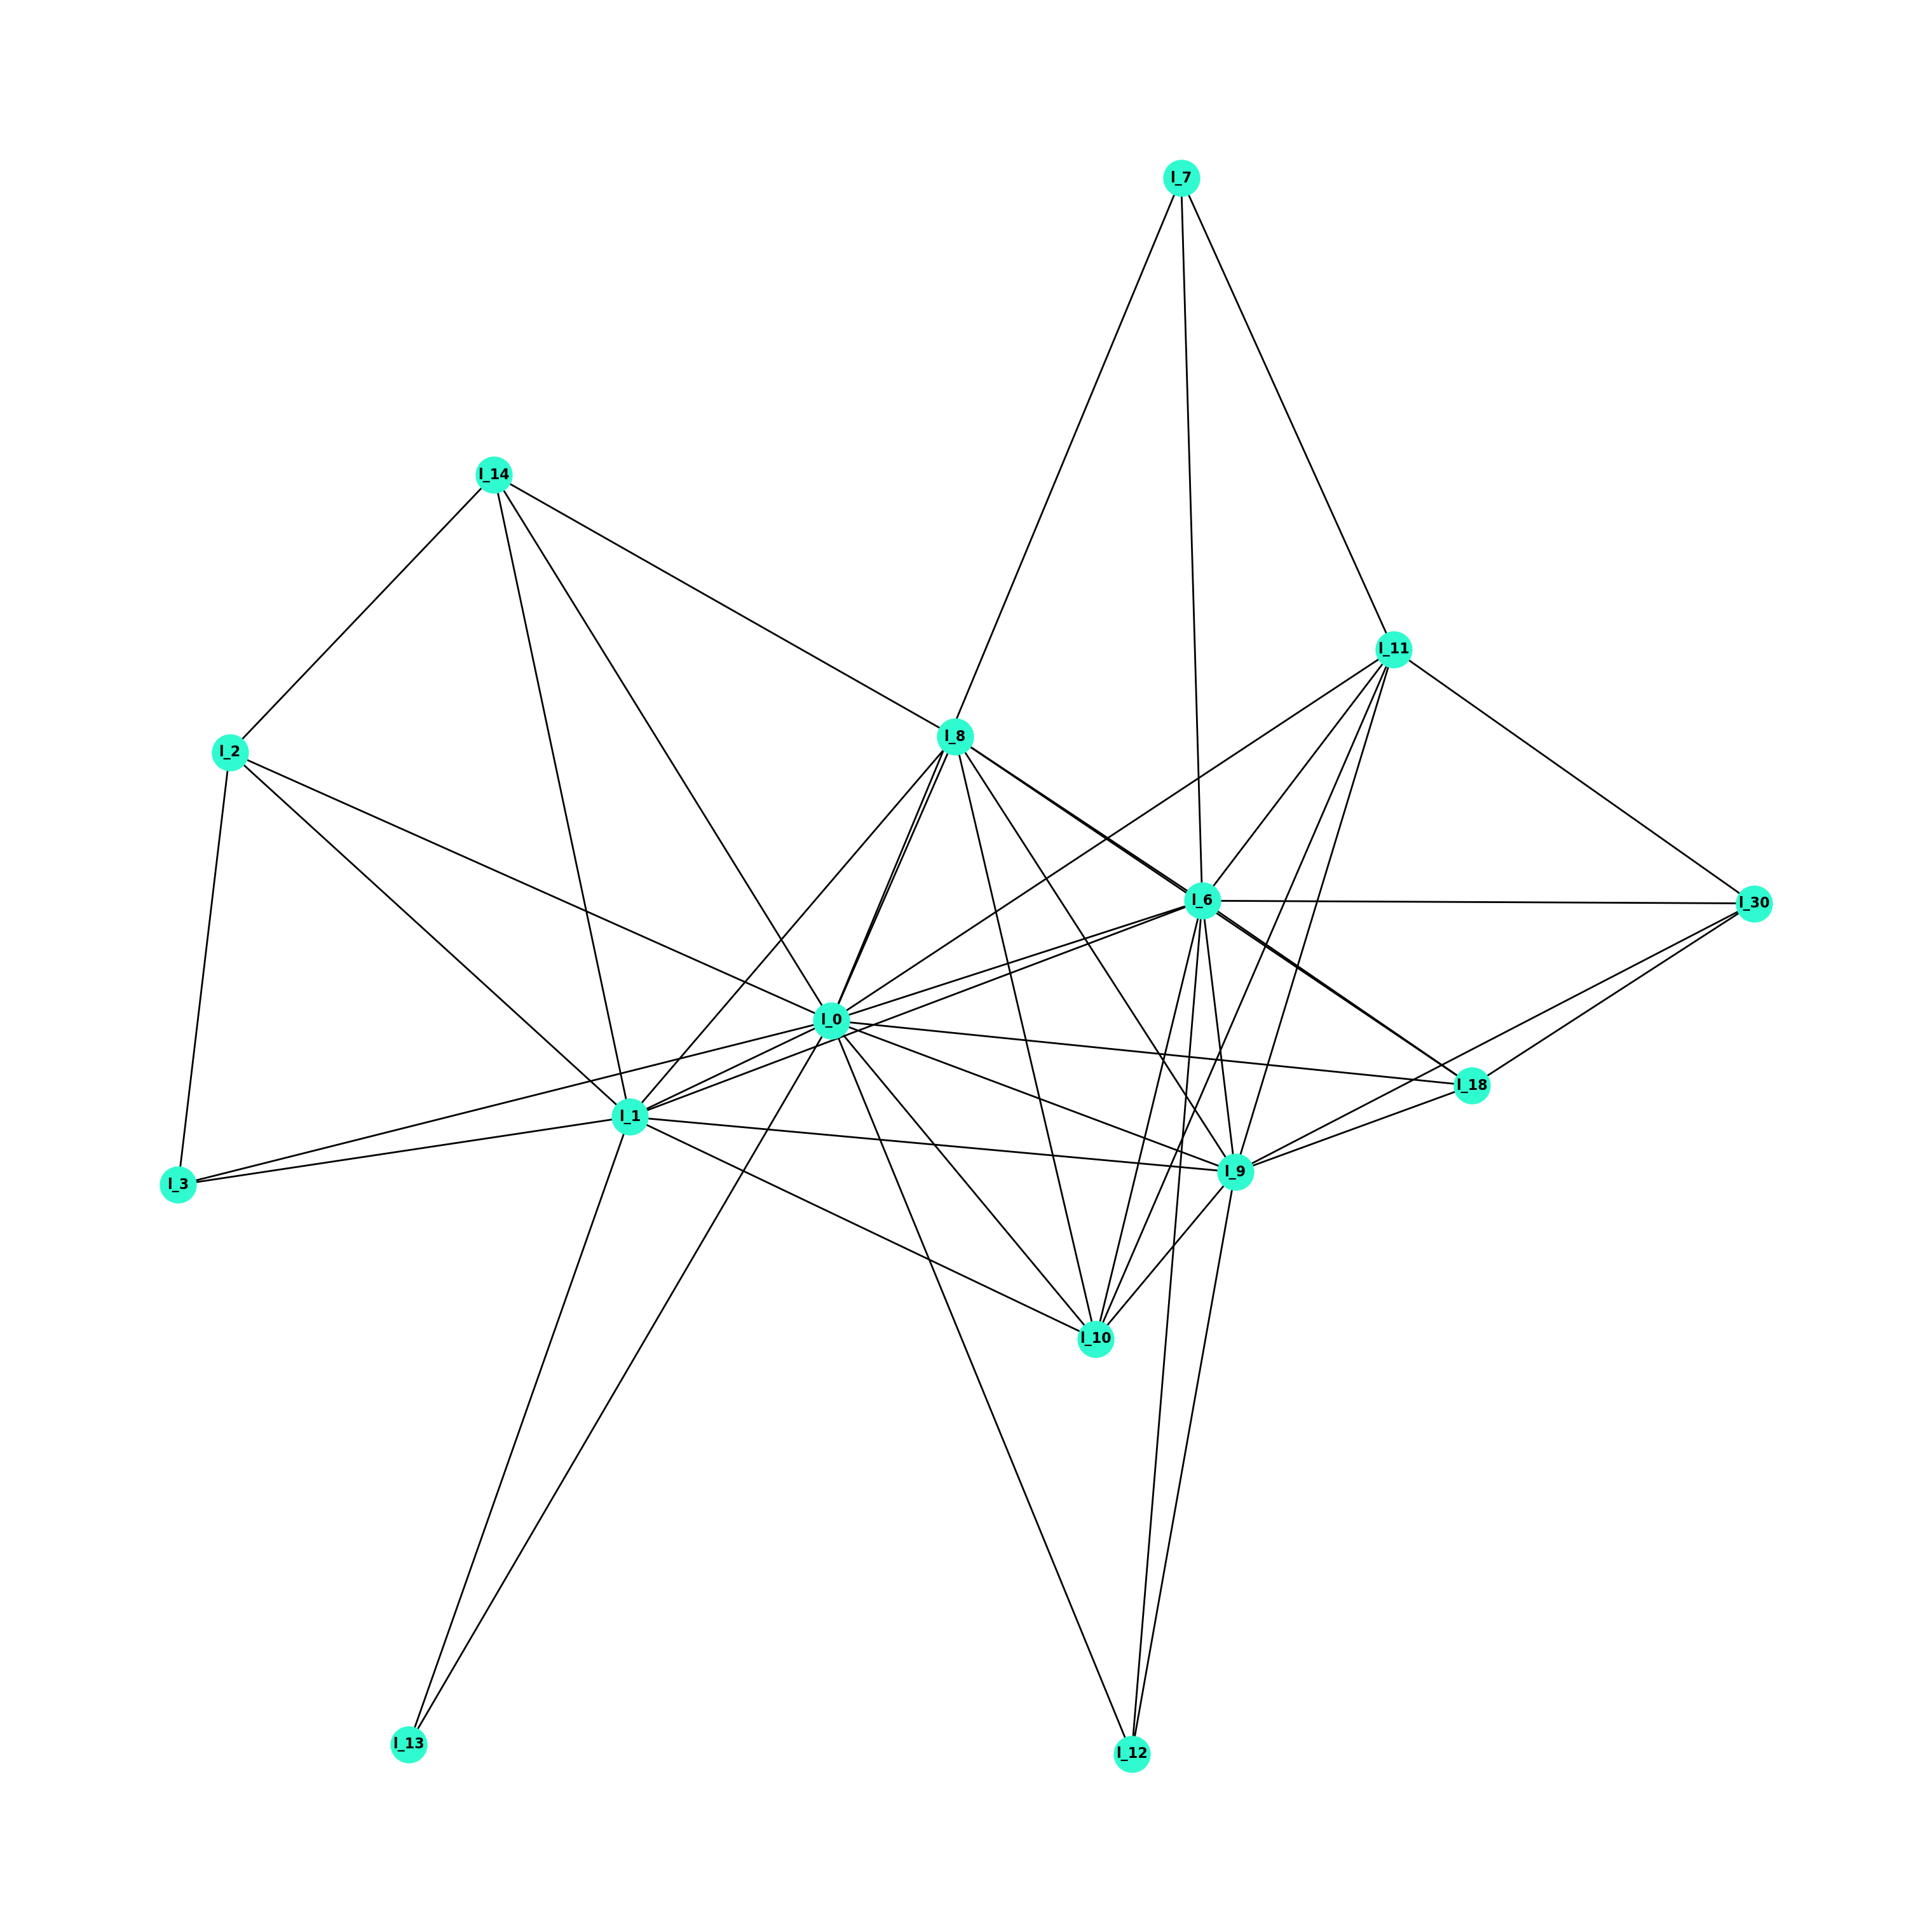

In [26]:
count= 0
G_langs_cliques = nx.Graph()

for clique in cliques:
    if len(clique) > 2:
        for node in clique:
            G_langs_cliques.add_node(node)
        for edge in combinations(clique, 2):
            G_langs_cliques.add_edge(edge[0], edge[1])

print(count)

plt.figure(num=None, figsize=(15, 15), dpi=200)
pos = nx.spring_layout(G_langs_cliques)
nx.draw(G_langs_cliques, pos, with_labels=True, font_size=8, font_weight='bold', node_color='#30FBD0',node_size=400)

#draw the cliques graph with only node degree > 1